In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import utilities
import global_variables as gv

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

## Multi-label Dataset

In [5]:
df1 = pd.read_csv('data/preprocessed-ukb46359.csv')
df1.drop('Unnamed: 0', axis=1, inplace=True)

df = pd.read_csv('data/imputed_ukb46359.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.rename(columns = {'outcome_hypertension':'hypertension'}, inplace=True)
df['age'] = df1['21003-0.0']
df

,30850-0.0,30780-0.0,30690-0.0,1488-0.0,30790-0.0,1418-0.0,1329-0.0,4079-0.0,1220-0.0,23101-0.0,...,outcome_myocardial_infarction,outcome_cardiomyopathies,outcome_ischemic_heart_disease,outcome_heart_failure,hypertension,outcome_peripheral_vascular_disease,outcome_cardiac_arrest,outcome_cerebral_infarction,outcome_arrhythmia,age
0,0.50800,3.88800,6.47700,6.0,65.1984,3.0,2.0,77.0,0.0,45.2,...,0,0,0,0,0,0,0,0,1,54.0
1,13.08800,3.52000,5.51200,2.0,15.4000,2.0,2.0,91.0,0.0,74.6,...,1,0,1,0,1,0,0,0,0,65.0
2,4.67500,3.04100,5.02800,5.0,48.9353,2.0,3.0,84.0,0.0,79.6,...,0,0,0,0,0,0,0,0,0,66.0
3,9.73364,4.10892,6.47949,0.0,50.8588,2.0,1.0,99.0,0.0,71.7,...,0,0,1,0,1,0,1,1,1,55.0
4,1.78800,2.88700,5.56500,0.0,56.5183,2.0,2.0,71.0,0.0,40.2,...,0,0,0,0,0,0,0,0,1,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101724,1.09949,3.87500,6.19000,0.0,169.2000,2.0,0.0,82.0,1.0,46.9,...,0,0,0,0,1,0,0,1,1,68.0
101725,9.03600,2.46700,4.03500,0.0,44.6578,1.0,1.0,90.0,0.0,66.3,...,0,0,0,1,1,0,0,0,0,58.0
101726,0.48500,3.80200,6.50700,4.0,45.3675,2.0,3.0,69.0,0.0,41.6,...,0,0,1,0,0,0,0,0,0,57.0
101727,0.72500,2.86300,4.66400,0.0,5.0900,3.0,1.0,73.0,0.0,44.9,...,0,0,1,0,1,0,0,0,0,64.0


In [6]:
df.columns

Index(['30850-0.0', '30780-0.0', '30690-0.0', '1488-0.0', '30790-0.0',
       '1418-0.0', '1329-0.0', '4079-0.0', '1220-0.0', '23101-0.0', '1428-0.0',
       '1249-0.0', '1349-0.0', '23099-0.0', '48-0.0', '1369-0.0', '23100-0.0',
       '20117-0.0', '1299-0.0', '2100-0.0', '21003-0.0', '30710-0.0',
       '1160-0.0', '30760-0.0', '1438-0.0', '2654-0.0', '4080-0.0',
       '30640-0.0', '1339-0.0', '30750-0.0', '21000-0.0', '2050-0.0',
       '1408-0.0', '49-0.0', '1200-0.0', '30770-0.0', '1538-0.0', '1458-0.0',
       '31-0.0', '1528-0.0', '1319-0.0', '30740-0.0', '6138-0.0', '1359-0.0',
       '1389-0.0', '1478-0.0', '2090-0.0', '1508-0.0', '845-0.0', '1379-0.0',
       '6142-0.0', '1468-0.0', '1289-0.0', '1548-0.0', '30630-0.0',
       '30870-0.0', '1239-0.0', '21001-0.0', '1309-0.0', '1448-0.0',
       'outcome_myocardial_infarction', 'outcome_cardiomyopathies',
       'outcome_ischemic_heart_disease', 'outcome_heart_failure',
       'hypertension', 'outcome_peripheral_vascular_disea

In [7]:
outcomes = ['outcome_myocardial_infarction','outcome_cardiomyopathies','outcome_ischemic_heart_disease','outcome_heart_failure','outcome_peripheral_vascular_disease','outcome_cardiac_arrest','outcome_cerebral_infarction','outcome_arrhythmia']


categorical_cols = ['1418','1329','1220','1428','1249','1349','1369','20117','2100','2654','1339','21000','2050','1408','1200','1538','31','6138','1359','1389','1478','2090','1508','1379','6142','1468','1548','1239','1448']
numerical_cols = ['1488','4079','1299','21003','1160','1438','4080','1458','1528','1319','845','1289','1309']
continuous_cols = ['30850','30780','30690','30790','23101','23099','48','23100','30710','30760','30640','30750','49','30770','30740','30630','30870','21001']

categorical_cols = [s + '-0.0' for s in categorical_cols]
numerical_cols = [s + '-0.0' for s in numerical_cols]
continuous_cols = [s + '-0.0' for s in continuous_cols]

categorical_cols=categorical_cols+['hypertension']

In [8]:
for col in gv.categorical_cols+['age']:
    if col in df.columns:
        df[col] = df[col].fillna(0).astype(int)
    else:
        continue
    
# create multi-label output column

for outcome in gv.outcomes:
    df[outcome] = df[outcome].fillna(0).astype(int)

df['hypertension'] = df['hypertension'].fillna(0).astype(int)
df['multi-labels'] = df[gv.outcomes].values.tolist()
df

,30850-0.0,30780-0.0,30690-0.0,1488-0.0,30790-0.0,1418-0.0,1329-0.0,4079-0.0,1220-0.0,23101-0.0,...,outcome_cardiomyopathies,outcome_ischemic_heart_disease,outcome_heart_failure,hypertension,outcome_peripheral_vascular_disease,outcome_cardiac_arrest,outcome_cerebral_infarction,outcome_arrhythmia,age,multi-labels
0,0.50800,3.88800,6.47700,6.0,65.1984,3,2,77.0,0,45.2,...,0,0,0,0,0,0,0,1,54,"[0, 0, 0, 0, 0, 0, 0, 1]"
1,13.08800,3.52000,5.51200,2.0,15.4000,2,2,91.0,0,74.6,...,0,1,0,1,0,0,0,0,65,"[1, 0, 1, 0, 0, 0, 0, 0]"
2,4.67500,3.04100,5.02800,5.0,48.9353,2,3,84.0,0,79.6,...,0,0,0,0,0,0,0,0,66,"[0, 0, 0, 0, 0, 0, 0, 0]"
3,9.73364,4.10892,6.47949,0.0,50.8588,2,1,99.0,0,71.7,...,0,1,0,1,0,1,1,1,55,"[0, 0, 1, 0, 0, 1, 1, 1]"
4,1.78800,2.88700,5.56500,0.0,56.5183,2,2,71.0,0,40.2,...,0,0,0,0,0,0,0,1,49,"[0, 0, 0, 0, 0, 0, 0, 1]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101724,1.09949,3.87500,6.19000,0.0,169.2000,2,0,82.0,1,46.9,...,0,0,0,1,0,0,1,1,68,"[0, 0, 0, 0, 0, 0, 1, 1]"
101725,9.03600,2.46700,4.03500,0.0,44.6578,1,1,90.0,0,66.3,...,0,0,1,1,0,0,0,0,58,"[0, 0, 0, 1, 0, 0, 0, 0]"
101726,0.48500,3.80200,6.50700,4.0,45.3675,2,3,69.0,0,41.6,...,0,1,0,0,0,0,0,0,57,"[0, 0, 1, 0, 0, 0, 0, 0]"
101727,0.72500,2.86300,4.66400,0.0,5.0900,3,1,73.0,0,44.9,...,0,1,0,1,0,0,0,0,64,"[0, 0, 1, 0, 0, 0, 0, 0]"


In [7]:
# protected_attributes
# sex (encoding 9)

# ethnic background (encoding 1001)
protected_attributes = ['31-0.0',  '21000-0.0'] # age 21003-0.0

# mappings
sex = {1.0:'Male', 
       0.0:'Female'
}

race = {1001.0:'British',
        1003.0:'Any other white background',
        1002.0:'Irish',
        3001.0:'Indian',
        6.0:'Other ethnic group',
        4001.0:'Caribbean',
        3002.0 :'Pakistani',
        4002.0 :'African',
        3004.0  :'Any other Asian background',
        1.0:'White',
        5.0:'Chinese',
        2004.0:'Any other mixed background',
        2003.0:'White and Asian',
        2001.0:'White and Black Caribbean',
        3003.0:'Bangladeshi',
        2002.0:'White and Black African',
        2.0:'Mixed',
        3.0:'Asian or Asian British',
        4003.0:'Any other Black background',
        4.0:'Black or Black British'    
}

In [8]:
df2 = df[gv.protected_attributes+gv.outcomes]

In [9]:
df2.head()

,31-0.0,21000-0.0,outcome_myocardial_infarction,outcome_cardiomyopathies,outcome_ischemic_heart_disease,outcome_heart_failure,outcome_peripheral_vascular_disease,outcome_cardiac_arrest,outcome_cerebral_infarction,outcome_arrhythmia
0,0,1001,0,0,0,0,0,0,0,1
1,1,1001,1,0,1,0,0,0,0,0
2,1,1001,0,0,0,0,0,0,0,0
3,1,1001,0,0,1,0,0,1,1,1
4,0,1002,0,0,0,0,0,0,0,1


In [10]:
df['gender'] = df['31-0.0'].map(gv.sex_mapping)
df['race'] = df['21000-0.0'].map(gv.race_mapping)

In [11]:
df.head()

,30850-0.0,30780-0.0,30690-0.0,1488-0.0,30790-0.0,1418-0.0,1329-0.0,4079-0.0,1220-0.0,23101-0.0,...,outcome_heart_failure,hypertension,outcome_peripheral_vascular_disease,outcome_cardiac_arrest,outcome_cerebral_infarction,outcome_arrhythmia,age,multi-labels,gender,race
0,0.50800,3.88800,6.47700,6.0,65.1984,3,2,77.0,0,45.2,...,0,0,0,0,0,1,54,"[0, 0, 0, 0, 0, 0, 0, 1]",Female,British
1,13.08800,3.52000,5.51200,2.0,15.4000,2,2,91.0,0,74.6,...,0,1,0,0,0,0,65,"[1, 0, 1, 0, 0, 0, 0, 0]",Male,British
2,4.67500,3.04100,5.02800,5.0,48.9353,2,3,84.0,0,79.6,...,0,0,0,0,0,0,66,"[0, 0, 0, 0, 0, 0, 0, 0]",Male,British
3,9.73364,4.10892,6.47949,0.0,50.8588,2,1,99.0,0,71.7,...,0,1,0,1,1,1,55,"[0, 0, 1, 0, 0, 1, 1, 1]",Male,British
4,1.78800,2.88700,5.56500,0.0,56.5183,2,2,71.0,0,40.2,...,0,0,0,0,0,1,49,"[0, 0, 0, 0, 0, 0, 0, 1]",Female,Irish


In [12]:
df2 = df[~((df['outcome_myocardial_infarction'] == 0) & (df['outcome_cardiomyopathies'] == 0) & (df['outcome_ischemic_heart_disease'] == 0) & (df['outcome_heart_failure'] == 0) & (df['outcome_peripheral_vascular_disease'] == 0) & (df['outcome_cardiac_arrest'] == 0) & (df['outcome_cerebral_infarction'] == 0) & (df['outcome_arrhythmia'] == 0))]

In [13]:
# switch 
# get a list of the columns
col_list = list(df)
# use this handy way to swap the elements
col_list[-13], col_list[-9], col_list[-4], col_list[-3]  = col_list[-9], col_list[-13], col_list[-3], col_list[-4]
# assign back, the order will now be swapped
df=df.loc[:,col_list]
df2=df2.loc[:,col_list]

In [14]:
# reorder cols to show continuous, numeric, and categorical cols grouped
cols= gv.continuous_cols+gv.numerical_cols+gv.categorical_cols
col_list2 = cols+list(df)[61:]
df=df.loc[:,col_list2]
df2=df2.loc[:,col_list2]

In [15]:
# ordinal encode race input

race = {1001:0,
        1003:1,
        1002:2,
        3001:3,
        6:4,
        4001:5,
        3002 :6,
        4002 :7,
        3004  :8,
        1:9,
        5:10,
        2004:11,
        2003:12,
        2001:13,
        3003:14,
        2002:15,
        2:16,
        3:17,
        4003:18,
        419: 19   
}

df['21000-0.0'] = df['21000-0.0'].map(race).fillna(0).astype(int)
df2['21000-0.0'] = df2['21000-0.0'].map(race).fillna(0).astype(int)

In [16]:
print(len(gv.continuous_cols))
print(len(gv.numerical_cols))
print(len(gv.categorical_cols))

18
13
30


In [19]:
# Describing numeric variables
df2[gv.numerical_cols+gv.continuous_cols].describe()

,1488-0.0,4079-0.0,1299-0.0,21003-0.0,1160-0.0,1438-0.0,4080-0.0,1458-0.0,1528-0.0,1319-0.0,...,30710-0.0,30760-0.0,30640-0.0,30750-0.0,49-0.0,30770-0.0,30740-0.0,30630-0.0,30870-0.0,21001-0.0
count,86955.000000,86955.000000,86955.000000,86955.000000,86955.000000,86955.000000,86955.000000,86955.000000,86955.000000,86955.000000,...,86955.000000,86955.000000,86955.000000,86955.000000,86955.000000,86955.000000,86955.000000,86955.000000,86955.000000,86955.000000
mean,3.671566,82.456057,2.181995,60.763061,7.180110,13.521593,143.836408,4.683684,2.755328,0.873006,...,3.201450,1.386904,0.996577,38.324810,105.151040,20.507954,5.373198,1.515895,1.884581,28.710220
std,3.030938,10.786437,2.156886,6.727478,1.254269,8.854012,19.540108,2.703264,2.152570,1.850119,...,5.022284,0.375908,0.245054,8.728314,9.842062,5.631442,1.650750,0.275643,1.063662,5.142287
min,0.000000,32.000000,0.000000,39.000000,1.000000,0.000000,69.000000,0.000000,0.000000,0.000000,...,0.080000,0.219000,0.401000,15.600000,30.000000,1.445000,0.995000,0.420000,0.242000,12.743300
25%,2.000000,75.000000,1.000000,57.000000,6.000000,7.000000,131.000000,3.000000,1.000000,0.000000,...,0.860000,1.109000,0.820000,34.040000,99.000000,16.826000,4.712000,1.314000,1.167160,25.242900
50%,3.000000,82.000000,2.000000,62.000000,7.000000,12.000000,143.000000,5.000000,2.000000,0.000000,...,1.740000,1.336000,0.993000,36.500000,104.000000,20.311000,5.031000,1.490000,1.619000,27.990400
75%,5.000000,89.000000,3.000000,66.000000,8.000000,18.000000,155.000000,7.000000,4.000000,1.000000,...,3.470000,1.622515,1.141000,39.600000,110.000000,23.765390,5.436000,1.698000,2.295000,31.329300
max,81.000000,148.000000,50.000000,72.000000,22.000000,200.000000,264.000000,55.000000,42.000000,100.000000,...,79.960000,4.087000,2.000000,265.600000,195.000000,114.421000,34.478000,2.499000,11.227000,68.408300


In [ ]:
df.to_csv('cleaned-outcomes-ukb46359.csv')
df2.to_csv('cleaned-outcomes-no-hypertension.csv')

### Visualize protected attribute distributions

In [17]:
df.columns
df['21000-0.0'].value_counts()

0     91518
2      2807
1      2691
3      1258
4       725
5       671
6       488
7       415
8       339
9       164
11      148
10      145
12      102
13       91
15       64
14       62
18       20
17       15
16        6
Name: 21000-0.0, dtype: int64

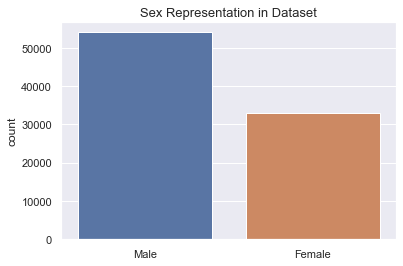

In [19]:
# define Seaborn color palette to use
sns.set_theme(style="darkgrid")
  
# plotting data on chart
ax = sns.countplot(x=df2['gender'],
                   order = df2['gender'].value_counts().index)
plt.title('Sex Representation in Dataset', fontsize=13)
plt.xlabel('')
plt.savefig('charts/sex_bar.png', bbox_inches='tight')

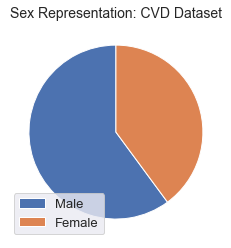

In [35]:
counts = df['gender'].value_counts()
labels = counts.index

#Plot pie chart
plt.pie(counts, startangle=90)
plt.legend(labels, loc=3,fontsize=13)
plt.title("Sex Representation: CVD Dataset",size=14)
plt.savefig('charts/EDA/sex_pie.png', bbox_inches='tight')

In [39]:
counts[0]/(counts[0]+counts[1])

0.6010478821181767

C:\Users\anali\AppData\Local\Temp/ipykernel_31148/2732465715.py:13: MatplotlibDeprecationWarning: 
The inverse_transformed function was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use transformed(transform.inverted()) instead.
  bb = leg.get_bbox_to_anchor().inverse_transformed(ax.transAxes)


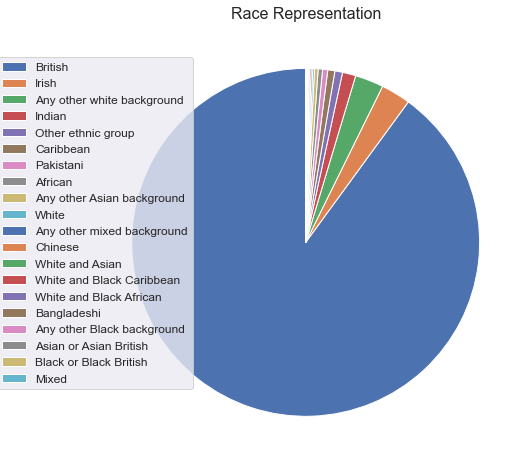

<Figure size 432x288 with 0 Axes>

In [23]:
counts2 = df['race'].value_counts()
labels2 = counts2.index

#Plot pie chart
plt.figure(figsize=(8,8))
plt.pie(counts2, startangle=90)
leg = plt.legend(labels2, loc=3, fontsize=12)
plt.title("Race Representation",size=16)

plt.draw() # Draw the figure so you can find the positon of the legend. 

# Get the bounding box of the original legend
bb = leg.get_bbox_to_anchor().inverse_transformed(ax.transAxes)

# Change to location of the legend. 
xOffset = -0.26
bb.x0 += xOffset
bb.x1 += xOffset
leg.set_bbox_to_anchor(bb, transform = ax.transAxes)


# Update the plot
plt.show()
plt.savefig('charts/race_pie.png', bbox_inches='tight')

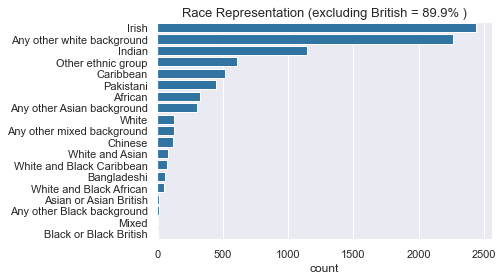

In [25]:
race_secondary = df2[df2['race'] != 'British']

ax = sns.countplot(y=race_secondary['race'],
                   color='tab:blue',
                   order = race_secondary['race'].value_counts().index)

plt.title('Race Representation (excluding British = 89.9% )', fontsize=13)
plt.ylabel('')

plt.savefig('charts/race_bar_exc_british.png', bbox_inches='tight')

In [26]:
(df2.shape[0] - race_secondary.shape[0])/df2.shape[0]

0.8993732390316831

In [28]:
df_counts = pd.DataFrame(columns = ['outcome', 'count'])

out_names = {'outcome_myocardial_infarction': 'Myocardial Infarction',
 'outcome_cardiomyopathies':'Cardiomyopathies',
 'outcome_ischemic_heart_disease':'Heart Disease',
 'outcome_heart_failure':'Heart Failure',
 'outcome_peripheral_vascular_disease':'Peripheral Vascular Disease',
 'outcome_cardiac_arrest':'Cardiac Arrest',
 'outcome_cerebral_infarction':'Cerebral Infarction',
 'outcome_arrhythmia':'Arrhythmia'
    
}

for outcome in gv.outcomes:   
    df_new = pd.DataFrame({'outcome':out_names[outcome], 'count':df2[outcome].sum()}, index=[0])
    df_counts = pd.concat([df_counts,df_new])
df_counts.head(10)

,outcome,count
0,Myocardial Infarction,22648
0,Cardiomyopathies,3434
0,Heart Disease,52870
0,Heart Failure,15327
0,Peripheral Vascular Disease,7800
0,Cardiac Arrest,2832
0,Cerebral Infarction,8319
0,Arrhythmia,46130


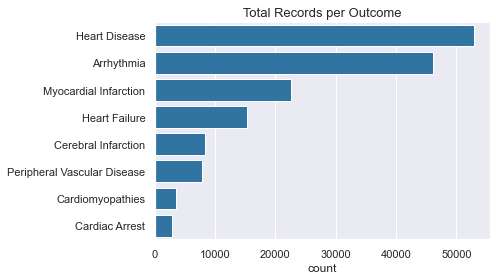

In [30]:
ax1 = sns.barplot(x='count',y='outcome',
            data=df_counts.sort_values('count', ascending=False),
            color='tab:blue')

plt.title('Total Records per Outcome', fontsize=13)
plt.ylabel('')
plt.savefig('charts/outcomes_bar.png', bbox_inches='tight')

[21474, 2965, 36234, 14646, 7181, 2335, 7506, 24198]


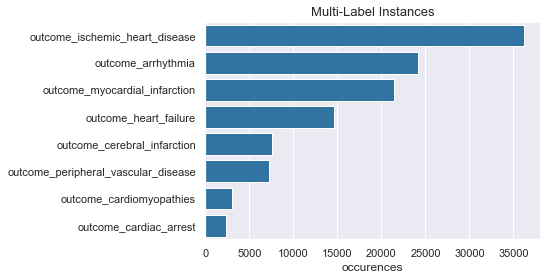

In [33]:
# find outcomes with multiple labels
multi_totals=[0,0,0,0,0,0,0,0]
for out in df2['multi-labels']:
    if sum(out)>1:
        multi_totals=[a+b for a,b in zip(out, multi_totals)]

print(multi_totals)

multi_table = pd.DataFrame(columns=['outcome', 'occurences'])
for name, total in zip(gv.outcomes,multi_totals):
    df_new = pd.DataFrame({'outcome':name, 'occurences':total}, index=[0])
    multi_table = pd.concat([multi_table,df_new])


ax1 = sns.barplot(x='occurences',y='outcome',
            data=multi_table.sort_values('occurences', ascending=False),
            color='tab:blue')

plt.title('Multi-Label Instances', fontsize=13)
plt.ylabel('')

plt.savefig('charts/multi_instances_bar.png', bbox_inches='tight')

C:\Users\anali\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


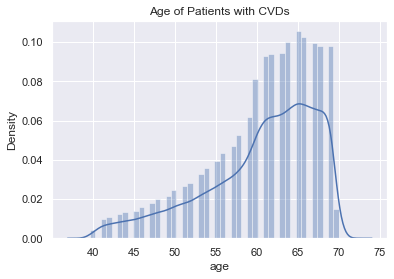

In [35]:
ax = sns.distplot(df.age)
plt.title('Age of Patients with CVDs')
plt.savefig('charts/age_distribution.png', bbox_inches='tight')

In [37]:
df_outs=df2[gv.outcomes].melt()

mapping = {0:1, 1:0}
df_outs['negatives']=df_outs['value'].map(mapping)
df_outs.rename(columns = {'value':'positives', 'variable':'outcome'}, inplace=True)
df_outs['outcome'] = df_outs['outcome'].map(out_names)
df_outs=df_outs.groupby(['outcome']).sum().reset_index()
df_outs

,outcome,positives,negatives
0,Arrhythmia,46130,40825
1,Cardiac Arrest,2832,84123
2,Cardiomyopathies,3434,83521
3,Cerebral Infarction,8319,78636
4,Heart Disease,52870,34085
5,Heart Failure,15327,71628
6,Myocardial Infarction,22648,64307
7,Peripheral Vascular Disease,7800,79155


In [38]:
df_outs.columns

Index(['outcome', 'positives', 'negatives'], dtype='object')

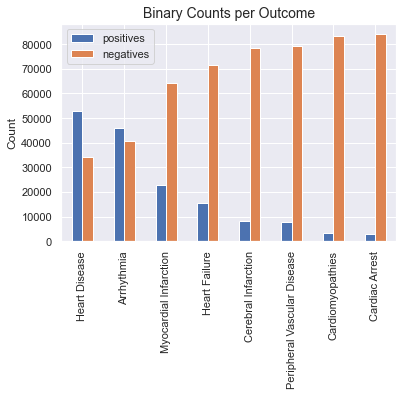

In [40]:
df_sorted= df_outs.sort_values('positives', ascending=False)
df_sorted.plot(x='outcome',y=['positives', 'negatives'], kind='bar')
plt.ylabel('Count')
plt.xlabel(' ')
plt.title('Binary Counts per Outcome', fontsize=14)
plt.savefig('charts/outcome_binary_counts_bar.png', bbox_inches='tight')

## Binary Dataset

In [3]:
# define Seaborn color palette to use
sns.set_theme(style="darkgrid")

df = pd.read_csv('data/entire_imputed.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)

df['age'] = df['21003-0.0']
df['sex'] = df['31-0.0'].map(gv.sex_mapping)
df['race'] = df['21000-0.0'].map(gv.race_mapping)

# bin age by decade
bins = [30, 40, 50, 60, 70, 80]
labels = ['30-39', '40-49', '50-59', '60-69', '70-79']
df['age-binned'] = pd.cut(x = df['age'], bins = bins, labels = labels, include_lowest = True)
df['race-binary']=df['race'].map(gv.binary_race)
df['race-grouped']=df['race'].map(gv.alternate_race_groupings)

In [4]:
df.to_csv('binary_full.csv')

In [5]:
df

,1319-0.0,1408-0.0,1329-0.0,1448-0.0,1538-0.0,6142-0.0,2050-0.0,1508-0.0,1339-0.0,30710-0.0,...,outcome_cerebral_infarction,outcome_arrhythmia,outcome_myocardial_infarction,CVD,age,sex,race,age-binned,race-binary,race-grouped
0,0.0,1.0,2.0,3.0,2.0,1.0,2.0,3.0,2.0,0.3400,...,0,1,0,1,54.0,Female,British,50-59,1,white
1,0.0,3.0,2.0,1.0,0.0,1.0,1.0,2.0,2.0,3.9400,...,0,0,1,0,65.0,Male,British,60-69,1,white
2,0.0,3.0,3.0,2.0,1.0,2.0,1.0,2.0,2.0,0.5500,...,0,0,0,0,69.0,Female,British,60-69,1,white
3,3.0,3.0,3.0,3.0,0.0,2.0,1.0,2.0,2.0,0.4500,...,0,0,0,0,66.0,Male,British,60-69,1,white
4,0.0,3.0,2.0,1.0,0.0,5.0,2.0,2.0,2.0,0.7500,...,0,0,0,0,48.0,Male,British,40-49,1,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502476,0.0,3.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.4500,...,0,0,0,0,63.0,Male,British,60-69,1,white
502477,0.0,1.0,1.0,3.0,2.0,2.0,1.0,1.0,1.0,2.7500,...,0,0,0,0,64.0,Female,British,60-69,1,white
502478,2.0,1.0,1.0,2.0,2.0,1.0,4.0,2.0,2.0,0.8500,...,0,1,1,1,43.0,Male,British,40-49,1,white
502479,3.0,3.0,1.0,3.0,0.0,1.0,1.0,2.0,2.0,3.5700,...,0,0,0,0,56.0,Female,British,50-59,1,white


C:\Users\anali\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


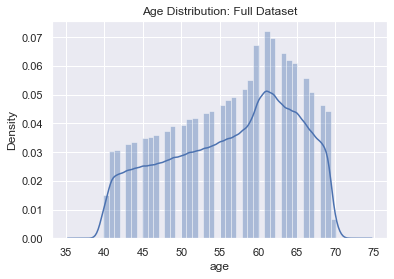

In [10]:
# age distributions
sns.set_theme(style="darkgrid")
ax = sns.distplot(df.age)
plt.title('Age Distribution: Full Dataset')
plt.savefig('charts/EDA/age_distribution_full.png', bbox_inches='tight')

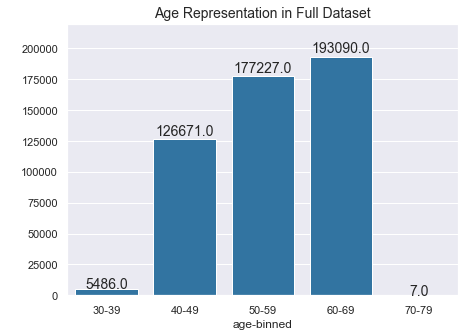

In [11]:
# plotting data on chart
# define Seaborn color palette to use
sns.set_theme(style="darkgrid")
fig = plt.figure(figsize=(7,5))
ax = sns.countplot(x=df['age-binned'],
                   order = labels,
                   color='tab:blue',)
plt.title('Age Representation in Full Dataset', fontsize=14)
plt.xlabel('age-binned')
plt.ylabel(' ')
plt.ylim(0, 220000)
utilities.show_values(ax,space=0.1)
plt.savefig('charts/EDA/age_binned_full.png', bbox_inches='tight')

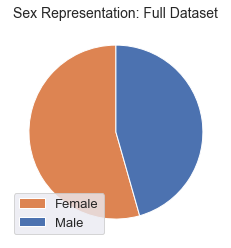

In [6]:
import matplotlib
counts = df['sex'].value_counts()
labels = counts.index
colors = ['C1','C0']#Plot pie chart
plt.pie(counts, startangle=90, colors=colors)
plt.legend(labels, loc=3,fontsize=13)
plt.title("Sex Representation: Full Dataset",size=14)
plt.savefig('charts/EDA/sex_pie_full.png', bbox_inches='tight')

In [15]:
counts

Female    273366
Male      229115
Name: sex, dtype: int64

In [42]:
counts[0]/(counts[0]+counts[1])

0.544032510681996

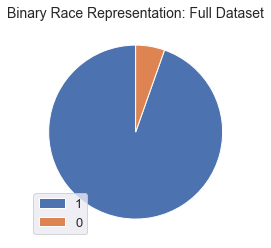

In [7]:
counts = df['race-binary'].value_counts()
labels = counts.index

#Plot pie chart
plt.pie(counts, startangle=90, colors=colors[::-1])
plt.legend(labels, loc=3,fontsize=13)
plt.title("Binary Race Representation: Full Dataset",size=14)
plt.savefig('charts/EDA/race_pie_full.png', bbox_inches='tight')

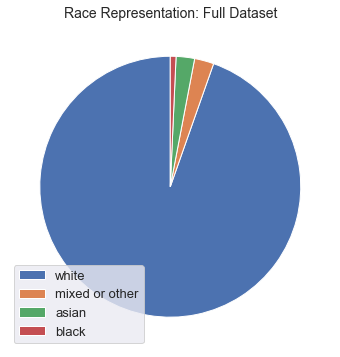

In [8]:
counts = df['race-grouped'].value_counts()
labels = counts.index

plt.figure(figsize=(6,6))
#Plot pie chart
plt.pie(counts, startangle=90)
plt.legend(labels, loc=3,fontsize=13)
plt.title("Race Representation: Full Dataset",size=14)
plt.savefig('charts/EDA/grouped_race_pie_full.png', bbox_inches='tight')

In [22]:
race_percents = round(counts/counts.sum()*100,2)
race_percents

white             94.61
mixed or other     2.40
asian              2.29
black              0.71
Name: race-grouped, dtype: float64

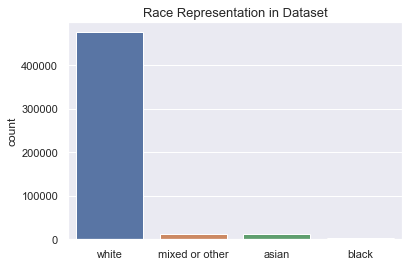

In [9]:
# plotting data on chart
ax = sns.countplot(x=df['race-grouped'],
                   order = df['race-grouped'].value_counts().index)
plt.title('Race Representation in Dataset', fontsize=13)
plt.xlabel('')
plt.savefig('charts/race_grouped_bar.png', bbox_inches='tight')

In [10]:
counts = df['race-grouped'].value_counts()
labels = counts.index

plt.figure(figsize=(6,6))
#Plot pie chart
plt.bar(counts, startangle=90)
plt.legend(labels, loc=3,fontsize=13)
plt.title("Race Representation: Full Dataset",size=14)
plt.savefig('charts/EDA/grouped_race_pie_full.png', bbox_inches='tight')

TypeError: bar() missing 1 required positional argument: 'height'

<Figure size 432x432 with 0 Axes>

In [51]:
counts = df['CVD'].value_counts()
counts[1]/(counts[0]+counts[1])

0.09180446623852444

### Correlation Plots

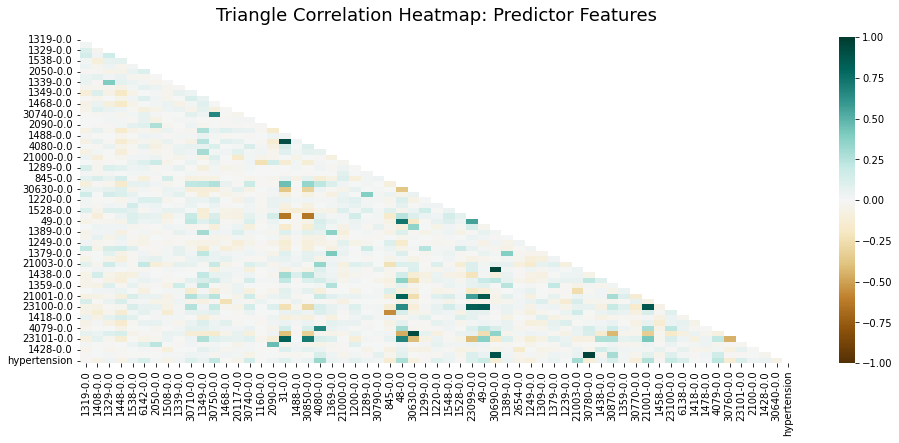

In [13]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df.iloc[:,:61].corr(), dtype='bool'))
heatmap = sns.heatmap(df.iloc[:,:61].corr(), mask=mask, vmin=-1, vmax=1, annot=False, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap: Predictor Features', fontdict={'fontsize':18}, pad=16)
plt.savefig('charts/EDA/triangle_heatmap.png', bbox_inches='tight')

In [67]:
cols = df.iloc[:,:61].columns.to_list()
dataframe = df.loc[:,cols+['CVD']]
dataframe.rename(columns=gv.input_mapping, inplace=True)
dataframe.reindex(df.CVD.abs().sort_values(ascending=False).index)
df_sorted = dataframe.corr()[['CVD']].sort_values(by='CVD', ascending=False)

In [68]:
df_sorted.head(60)

,CVD
CVD,1.000000
hypertension,0.218000
age,0.180952
waist circumference,0.124473
whole body fat-free mass,0.104632
Sex,0.089924
BMI,0.080111
HbA1c,0.075810
hip circumference,0.073969
testosterone,0.073466


In [78]:
df2 = df_sorted.iloc[df_sorted.CVD.abs().argsort()][::-1]
df2=df2.iloc[1:11,:]

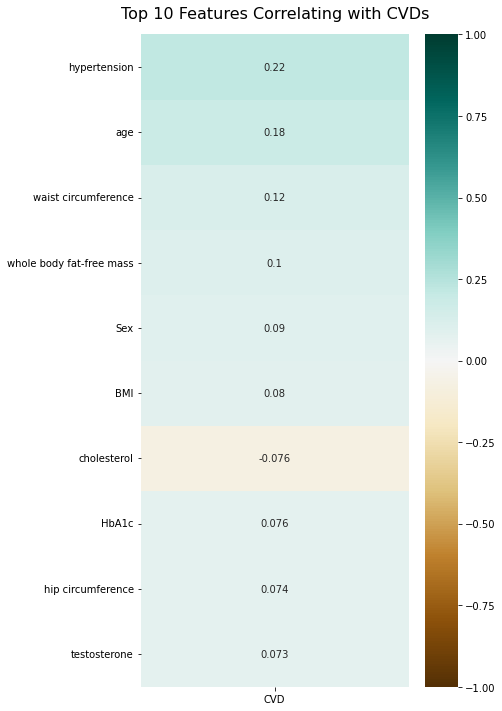

In [79]:
plt.figure(figsize=(6, 12))
heatmap = sns.heatmap(df2, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Top 10 Features Correlating with CVDs', fontdict={'fontsize':16}, pad=16);
plt.savefig('charts/EDA/correlation_top10.png', bbox_inches='tight')

### Proxy Variables

In [ ]:
# from sklearn.model_selection import RepeatedKFold
# from sklearndf.pipeline import RegressorPipelineDF
# from sklearndf.regression import RandomForestRegressorDF

# from facet.data import Sample
# from facet.selection import LearnerRanker, LearnerGrid

# sample = Sample(observations=df2.iloc[:,:61], target_name='31-0.0')

# # create a (trivial) pipeline for a random forest regressor
# rnd_forest_reg = RegressorPipelineDF(
#     regressor=RandomForestRegressorDF(n_estimators=200, random_state=42)
# )

# # define grid of models which are "competing" against each other
# rnd_forest_grid = [
#     LearnerGrid(
#         pipeline=rnd_forest_reg,
#         learner_parameters={
#             "min_samples_leaf": [8, 11, 15],
#             "max_depth": [4, 5, 6],
#         }
#     ),
# ]

# # create repeated k-fold CV iterator
# rkf_cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=42)

# # rank your candidate models by performance (default is mean CV score - 2*SD)
# ranker = LearnerRanker(grids=rnd_forest_grid, cv=rkf_cv, n_jobs=-3).fit(sample=df2.iloc[:,:61])

# # get summary report
# ranker.summary_report()